In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

In [107]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/var/folders/35/3hw9ds4j4xv060bywk0frfdw0000gn/T/ipykernel_43329/3462665596.py:4: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



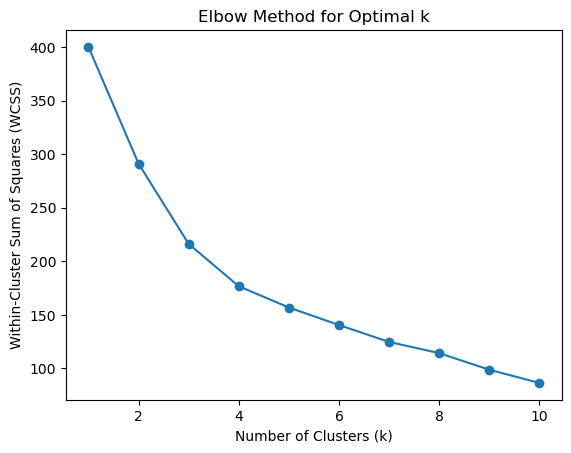

In [108]:

# Load your dataset
DF = pd.read_csv("CLEANED_CLUSTERING.csv")

# Select specific columns for clustering (Team Performance)
team_performance_columns = ['PTS', 'ORB', 'DRB', 'W','FG%','3P%','2P%','FT%']
DF = DF[team_performance_columns]

# Standardize the data
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(DF)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_for_clustering_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

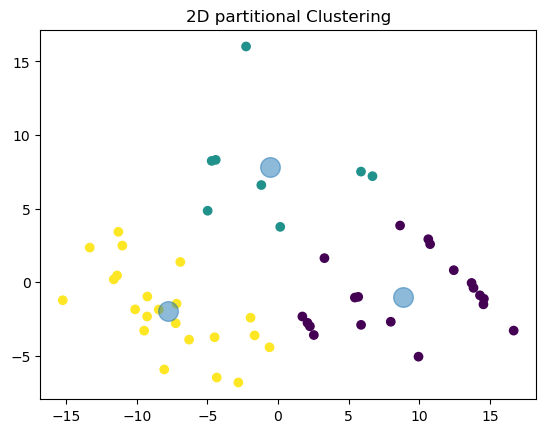

In [121]:

# Select specific columns for clustering (Team Performance)
team_performance_columns = ['PTS', 'ORB', 'DRB', 'W','FG%','3P%','2P%','FT%']
DF = DF[team_performance_columns]


k= 3
## Function that creates random centroids
def RandomCentroidInit (DF, k):
    MyCentroids=[]
    for i in range(k):
        nextcentroid=DF.apply(lambda x: float(x.sample()))
        MyCentroids.append(nextcentroid)
    return pd.concat(MyCentroids, axis=1)

MyCentroids=RandomCentroidInit(DF, k)
print(MyCentroids)

## Function that finds distances between all points and all centroids
## Label each point with a centroid (starting at 0)
def Label_Data(DF, MyCentroids):
    dist=MyCentroids.apply(lambda x: np.sqrt(((DF - x)**2).sum(axis=1)))
    labels=dist.idxmin(axis=1)
    return labels

cluster_labels=Label_Data(DF,MyCentroids)
#print(cluster_labels)
## How many points are in each label/cluster right now
print(cluster_labels.value_counts())

def Updated_Centroids(DF, cluster_labels, k):
    Cluster_Means=DF.groupby(cluster_labels).apply(lambda x: x.mean()).T
    return Cluster_Means

MyCentroids=Updated_Centroids(DF, cluster_labels, k)
print(MyCentroids)

##################### PCA if your data is ....




def ClusterPlot(DF, cluster_labels, MyCentroids, iteration):
    MyPCA=PCA(n_components=2)
    Data2D = MyPCA.fit_transform(DF)
    Centroids2D=MyPCA.transform(MyCentroids.T)
    clear_output(wait=True)
    plt.title("2D partitional Clustering")
    plt.scatter(x=Data2D[:,0], y =Data2D[:,1],  c=cluster_labels )
    plt.scatter(x =Centroids2D[:,0], y= Centroids2D[:,1],s=200, alpha=0.5)
    plt.show()
    

## Iterate
NumInterations = 50
iteration=1

while iteration < NumInterations:
    print("Iteration: ", iteration)
    cluster_labels=Label_Data(DF, MyCentroids)
    MyCentroids=Updated_Centroids(DF, cluster_labels, k)
    print("Centroids:\n", MyCentroids)
    ClusterPlot(DF, cluster_labels, MyCentroids, iteration) 
    iteration = iteration + 1
    
    
    
    

In [110]:
DF

,PTS,ORB,DRB,W,FG%,3P%,2P%,FT%
0,22.2,1.3,4.0,47,0.474,0.350,0.509,0.854
1,21.3,2.9,9.4,47,0.545,0.421,0.585,0.858
2,8.0,2.0,1.0,65,0.333,0.250,0.400,0.500
3,18.6,0.6,4.8,65,0.460,0.380,0.532,0.919
4,13.9,3.3,7.6,65,0.652,0.000,0.653,0.560
5,18.0,0.4,2.1,65,0.428,0.359,0.544,0.809
6,12.1,0.4,2.9,65,0.407,0.369,0.504,0.850
7,30.4,0.6,4.8,65,0.449,0.367,0.531,0.858
8,6.8,0.3,2.9,65,0.406,0.276,0.493,0.889
9,7.5,0.4,2.7,65,0.481,0.364,0.599,0.684


In [117]:



# Standardize the data (important for KMeans)
scaler = StandardScaler()
df_team_scaled = scaler.fit_transform(DF_)

# Perform KMeans clustering
k = 2 # You can change the number of clusters as needed
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_team_scaled)




# Visualize clusters in 3D using PCA
pca_3d = PCA(n_components=3)
df_team_3d = pca_3d.fit_transform(df_team_scaled)
df_team_3d = pd.DataFrame(df_team_3d, columns=['PC 1', 'PC 2', 'PC 3'])
df_team_3d['Cluster'] = cluster_labels

fig_3d = px.scatter_3d(df_team_3d, x='PC 1', y='PC 2', z='PC 3', color='Cluster', title='3D Clustering Visualization')
fig_3d.show()


# Visualize clusters in 2D using PCA
pca_2d = PCA(n_components=2)
df_team_2d = pca_2d.fit_transform(df_team_scaled)
df_team_2d = pd.DataFrame(df_team_2d, columns=['PC 1', 'PC 2'])
df_team_2d['Cluster'] = cluster_labels

fig_2d = px.scatter(df_team_2d, x='PC 1', y='PC 2', color='Cluster', title='2D Clustering Visualization')
fig_2d.show()
fig_2d.write_html("k22d.html")



k = 3# You can change the number of clusters as needed
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels= kmeans.fit_predict(df_team_scaled)
DF_['Cluster']  = cluster_labels

# Visualize clusters in 3D using PCA
pca_3d = PCA(n_components=3)
df_team_3d = pca_3d.fit_transform(df_team_scaled)
df_team_3d = pd.DataFrame(df_team_3d, columns=['PC 1', 'PC 2', 'PC 3'])
df_team_3d['Cluster'] = cluster_labels

fig_3d = px.scatter_3d(df_team_3d, x='PC 1', y='PC 2', z='PC 3', color='Cluster', title='3D Clustering Visualization')
fig_3d.show()
fig_3d.write_html("k33d.html")

# Visualize clusters in 2D using PCA
pca_2d = PCA(n_components=2)
df_team_2d = pca_2d.fit_transform(df_team_scaled)
df_team_2d = pd.DataFrame(df_team_2d, columns=['PC 1', 'PC 2'])
df_team_2d['Cluster'] = cluster_labels

fig_2d = px.scatter(df_team_2d, x='PC 1', y='PC 2', color='Cluster', title='2D Clustering Visualization')
fig_2d.show()
fig_2d.write_html("k32d.html")



k = 4 # You can change the number of clusters as needed
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_team_scaled)

# Visualize clusters in 3D using PCA
pca_3d = PCA(n_components=3)
df_team_3d = pca_3d.fit_transform(df_team_scaled)
df_team_3d = pd.DataFrame(df_team_3d, columns=['PC 1', 'PC 2', 'PC 3'])
df_team_3d['Cluster'] = cluster_labels

fig_3d = px.scatter_3d(df_team_3d, x='PC 1', y='PC 2', z='PC 3', color='Cluster', title='3D Clustering Visualization')
fig_3d.show()
fig_3d.write_html("k43d.html")

# Visualize clusters in 2D using PCA
pca_2d = PCA(n_components=2)
df_team_2d = pca_2d.fit_transform(df_team_scaled)
df_team_2d = pd.DataFrame(df_team_2d, columns=['PC 1', 'PC 2'])
df_team_2d['Cluster'] = cluster_labels

fig_2d = px.scatter(df_team_2d, x='PC 1', y='PC 2', color='Cluster', title='2D Clustering Visualization')
fig_2d.show()
fig_2d.write_html("k42d.html")



k = 5 # You can change the number of clusters as needed
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_team_scaled)

# Visualize clusters in 3D using PCA
pca_3d = PCA(n_components=3)
df_team_3d = pca_3d.fit_transform(df_team_scaled)
df_team_3d = pd.DataFrame(df_team_3d, columns=['PC 1', 'PC 2', 'PC 3'])
df_team_3d['Cluster'] = cluster_labels

fig_3d = px.scatter_3d(df_team_3d, x='PC 1', y='PC 2', z='PC 3', color='Cluster', title='3D Clustering Visualization')
fig_3d.show()
fig_3d.write_html("k53d.html")

# Visualize clusters in 2D using PCA
pca_2d = PCA(n_components=2)
df_team_2d = pca_2d.fit_transform(df_team_scaled)
df_team_2d = pd.DataFrame(df_team_2d, columns=['PC 1', 'PC 2'])
df_team_2d['Cluster'] = cluster_labels

fig_2d = px.scatter(df_team_2d, x='PC 1', y='PC 2', color='Cluster', title='2D Clustering Visualization')
fig_2d.show()
fig_2d.write_html("k52d.html")



k = 6 # You can change the number of clusters as needed
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_team_scaled)

# Visualize clusters in 3D using PCA
pca_3d = PCA(n_components=3)
df_team_3d = pca_3d.fit_transform(df_team_scaled)
df_team_3d = pd.DataFrame(df_team_3d, columns=['PC 1', 'PC 2', 'PC 3'])
df_team_3d['Cluster'] = cluster_labels

fig_3d = px.scatter_3d(df_team_3d, x='PC 1', y='PC 2', z='PC 3', color='Cluster', title='3D Clustering Visualization')
fig_3d.show()
fig_3d.write_html("k63d.html")

# Visualize clusters in 2D using PCA
pca_2d = PCA(n_components=2)
df_team_2d = pca_2d.fit_transform(df_team_scaled)
df_team_2d = pd.DataFrame(df_team_2d, columns=['PC 1', 'PC 2'])
df_team_2d['Cluster'] = cluster_labels

fig_2d = px.scatter(df_team_2d, x='PC 1', y='PC 2', color='Cluster', title='2D Clustering Visualization')
fig_2d.show()
fig_2d.write_html(".html")


# Display count of data points in each cluster
cluster_counts = DF_['Cluster'].value_counts()
print(cluster_counts)


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/35/3hw9ds4j4xv060bywk0frfdw0000gn/T/ipykernel_43329/3969789745.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



1    33
0    11
2    6 
Name: Cluster, dtype: int64


In [52]:
DF

,Unnamed: 0,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,Pts Won,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS
0,522,Jimmy Butler,28,59,59,36.7,7.4,15.6,0.474,1.2,...,5.0,1010.0,0.005,47,35,0.573,2.0,109.5,107.3,2.35
1,524,Karl-Anthony Towns,22,82,82,35.6,7.8,14.3,0.545,1.5,...,0.0,0.0,0.000,47,35,0.573,2.0,109.5,107.3,2.35
2,859,Aaron Jackson,31,1,0,35.0,3.0,9.0,0.333,1.0,...,0.0,0.0,0.000,65,17,0.793,0.0,112.4,103.9,8.21
3,863,Chris Paul,32,58,58,31.8,6.3,13.8,0.460,2.5,...,0.0,0.0,0.000,65,17,0.793,0.0,112.4,103.9,8.21
4,864,Clint Capela,23,74,74,27.5,6.0,9.1,0.652,0.0,...,0.0,0.0,0.000,65,17,0.793,0.0,112.4,103.9,8.21
5,865,Eric Gordon,29,69,30,31.2,6.0,14.1,0.428,3.2,...,0.0,0.0,0.000,65,17,0.793,0.0,112.4,103.9,8.21
6,866,Gerald Green,32,41,2,22.7,4.1,10.1,0.407,2.7,...,0.0,0.0,0.000,65,17,0.793,0.0,112.4,103.9,8.21
7,867,James Harden,28,72,72,35.4,9.0,20.1,0.449,3.7,...,965.0,1010.0,0.955,65,17,0.793,0.0,112.4,103.9,8.21
8,868,Joe Johnson,36,55,4,21.9,2.7,6.5,0.406,0.7,...,0.0,0.0,0.000,65,17,0.793,0.0,112.4,103.9,8.21
9,869,Luc Mbah a Moute,31,61,15,25.6,2.7,5.7,0.481,1.0,...,0.0,0.0,0.000,65,17,0.793,0.0,112.4,103.9,8.21


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



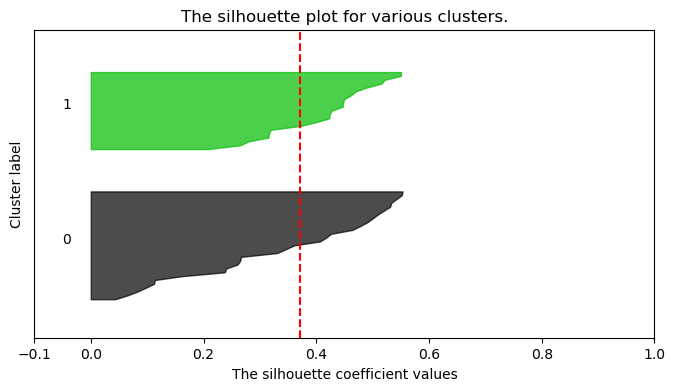

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



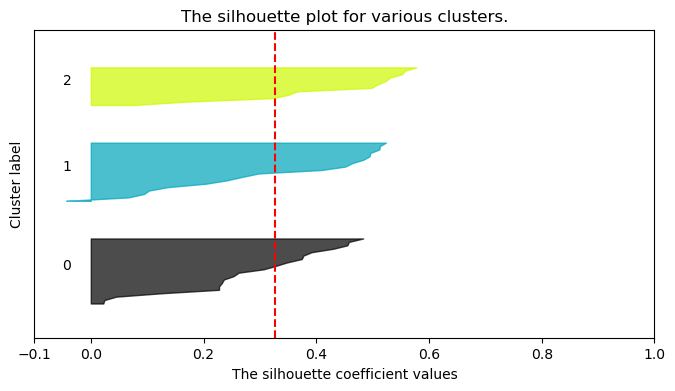

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



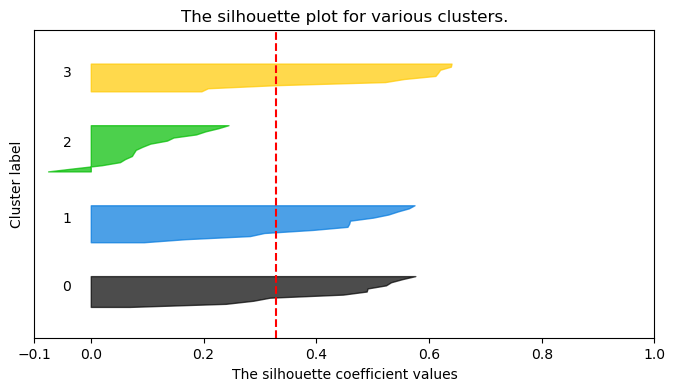

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



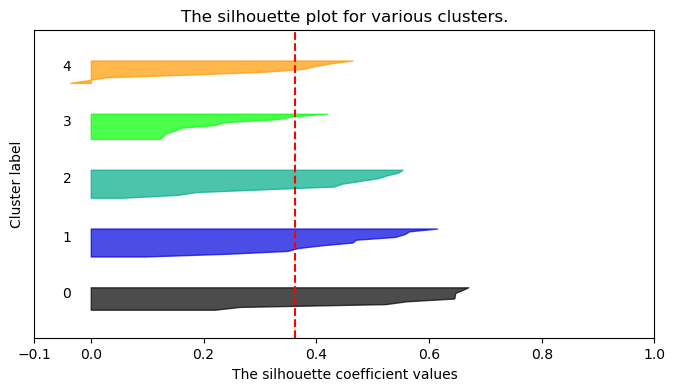

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



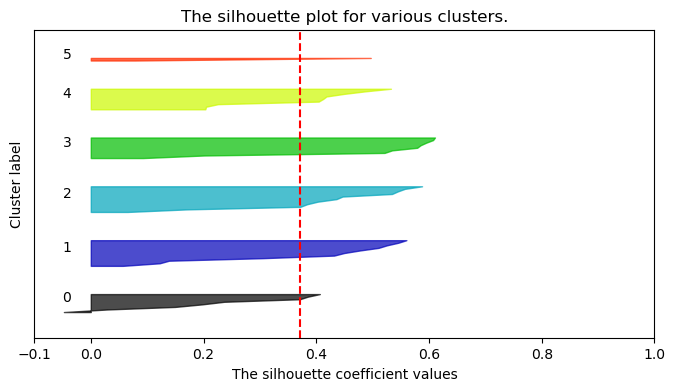

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



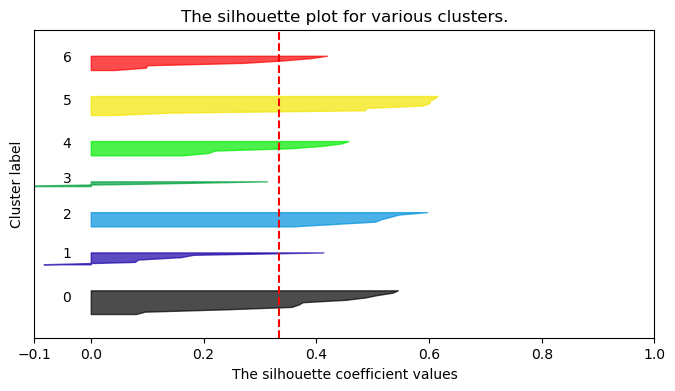

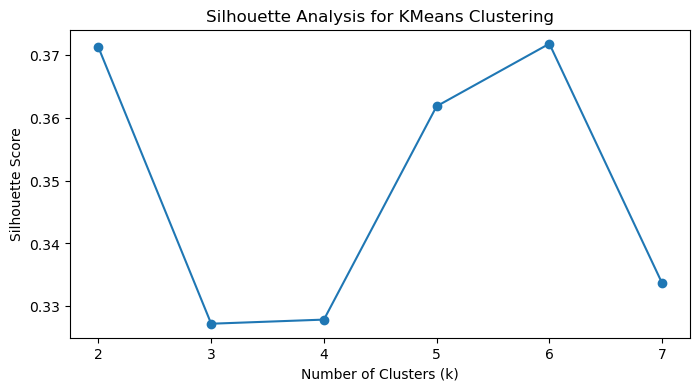

In [96]:

DF_18 = pd.read_csv("CLEANED_CLUSTERING.csv")

# Select features for clustering
features_for_clustering = ['PTS', 'W', 'ORB','DRB','W/L%']
data_for_clustering = DF_18[features_for_clustering]

# Standardize the data
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

# Number of clusters (k) for silhouette analysis
k_values = range(2, 8)

# List to store silhouette scores
silhouette_scores = []

# Perform silhouette analysis for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_for_clustering_scaled)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data_for_clustering_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Calculate silhouette values for each data point
    silhouette_values = silhouette_samples(data_for_clustering_scaled, cluster_labels)
    
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    fig.set_size_inches(8, 4)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example, all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (k+1)*10 is for inserting blank space between silhouette plots of
    # individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_for_clustering_scaled) + (k + 1) * 10])
    
    y_lower = 10
    
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title("The silhouette plot for various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.show()

# Plot the silhouette scores for different values of k
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [122]:
# Assuming df is your DataFrame and 'Cluster' is the column representing cluster assignments
cluster_0 = DF_[DF_['Cluster'] == 0]
cluster_1 = DF_[DF_['Cluster'] == 1]
cluster_2 = DF_[DF_['Cluster'] == 2]

In [123]:
cluster_0

,PTS,ORB,DRB,W,FG%,3P%,2P%,FT%,Cluster
1,21.3,2.9,9.4,47,0.545,0.421,0.585,0.858,0
28,12.7,2.4,6.2,59,0.568,0.405,0.587,0.806,0
34,22.9,2.3,8.7,52,0.483,0.308,0.527,0.769,0
40,25.4,1.9,8.2,48,0.449,0.298,0.485,0.737,0
41,17.6,1.7,7.5,50,0.458,0.415,0.494,0.880,0
42,27.5,1.2,7.5,50,0.542,0.367,0.603,0.731,0
43,28.1,2.5,8.6,48,0.534,0.340,0.558,0.828,0
44,25.2,2.2,10.7,48,0.470,0.354,0.530,0.746,0
47,26.9,2.1,8.0,44,0.529,0.307,0.554,0.760,0
48,23.1,3.3,5.2,47,0.510,0.293,0.526,0.837,0


In [124]:
cluster_1

,PTS,ORB,DRB,W,FG%,3P%,2P%,FT%,Cluster
0,22.2,1.3,4.0,47,0.474,0.350,0.509,0.854,1
2,8.0,2.0,1.0,65,0.333,0.250,0.400,0.500,1
3,18.6,0.6,4.8,65,0.460,0.380,0.532,0.919,1
5,18.0,0.4,2.1,65,0.428,0.359,0.544,0.809,1
6,12.1,0.4,2.9,65,0.407,0.369,0.504,0.850,1
7,30.4,0.6,4.8,65,0.449,0.367,0.531,0.858,1
8,6.8,0.3,2.9,65,0.406,0.276,0.493,0.889,1
9,7.5,0.4,2.7,65,0.481,0.364,0.599,0.684,1
11,6.1,1.1,4.4,65,0.390,0.371,0.435,0.717,1
12,9.3,1.4,3.6,65,0.431,0.386,0.539,0.774,1


In [126]:
cluster_2

,PTS,ORB,DRB,W,FG%,3P%,2P%,FT%,Cluster
4,13.9,3.3,7.6,65,0.652,0.000,0.653,0.560,2
10,6.5,1.0,2.3,65,0.569,0.000,0.574,0.636,2
13,3.5,1.2,2.0,65,0.591,0.091,0.638,0.460,2
23,14.3,2.4,6.6,49,0.505,0.000,0.508,0.630,2
27,6.9,2.0,2.8,59,0.659,0.500,0.660,0.594,2
31,15.8,1.8,6.3,52,0.545,0.000,0.551,0.560,2
